<a href="https://colab.research.google.com/github/Felix050/CursoPandas2023/blob/master/10_02_23_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algumas colunas do DataFrame não foram possiveis de fazer os graficos individualmente :(
As colunas não são do tipo float ou int.

In [1]:
# Importando biblioteca pandas no Python
import pandas as pd

In [2]:
# Utilizando minha base de dados escolhida
mercadoDeDados_df = pd.read_excel("StateOfData.xlsx")
display(mercadoDeDados_df.head())

,"('P1_a ', 'Idade')","('P1_b ', 'Genero')","('P1_e_b ', 'Regiao onde mora')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",Unnamed: 9
0,38.0,Masculino,Nordeste,Pós-graduação,Química / Física,Empregado (CLT),Marketing,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,NaN
1,39.0,Masculino,Nordeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,NaN
2,30.0,Masculino,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,NaN
3,38.0,Feminino,Sudeste,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,NaN
4,36.0,Masculino,Sul,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,NaN


Text(0, 0.5, 'Quantidade de respostas')

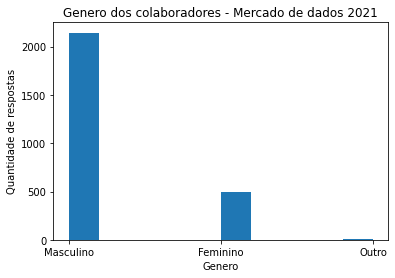

In [11]:
#Importando biblioteca para fazer graficos
#Aqui utilizei o sexo das pessoas que preencheram a pesquisa
#Podemos ver que a maioria é homem

import matplotlib.pyplot as plt

plt.hist(mercadoDeDados_df["('P1_b ', 'Genero')"])
plt.title("Genero dos colaboradores - Mercado de dados 2021")
#Rótulo horizontal e vertical
plt.xlabel("Genero")
plt.ylabel("Quantidade de respostas")

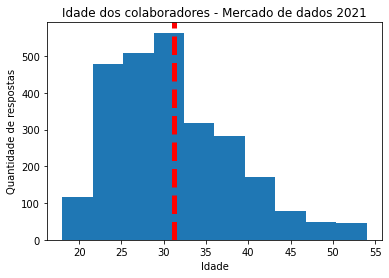

In [27]:
#Aqui vemos que a maioria tem entre 25 a 30 anos
plt.hist(mercadoDeDados_df["('P1_a ', 'Idade')"])
plt.title("Idade dos colaboradores - Mercado de dados 2021")
#Rótulo horizontal e vertical
plt.xlabel("Idade")
plt.ylabel("Quantidade de respostas")
#Traça a linha vermelha tracejada com o preço médio
plt.axvline(mercadoDeDados_df["('P1_a ', 'Idade')"].mean(), color='red', linestyle='dashed', linewidth=5)

In [29]:
c_mean = mercadoDeDados_df["('P1_a ', 'Idade')"].groupby(by=mercadoDeDados_df["('P1_b ', 'Genero')"]).mean()
display(c_mean)

('P1_b ', 'Genero')
Feminino     30.584521
Masculino    31.308310
Outro        26.250000
Name: ('P1_a ', 'Idade'), dtype: float64

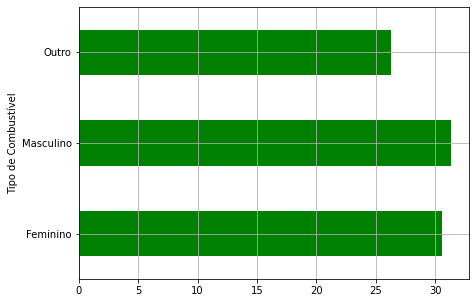

In [31]:
#Vou definir a área do gráfico
plt.figure(figsize=(7,5))

#Plotar o gráfico
c_mean.plot(
    kind="barh",
    xlabel="IDADE",
    ylabel="QUANTIDADE DE RESPOSTAS",
    color="green"
)

#Grid
plt.grid()

#Exibe
plt.show()

In [34]:
#c_mean.reset_index(inplace=True)
display(c_mean)

excel = "GeneroIdade.xlsx"
c_mean.to_excel(excel, "Sumário")

('P1_b ', 'Genero')
Feminino     30.584521
Masculino    31.308310
Outro        26.250000
Name: ('P1_a ', 'Idade'), dtype: float64

In [41]:
#Vamor personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

#Vai abrir o Excel no openpyxl
wb = load_workbook(excel) # wb = Workbook

#Pegar a planilha certa... usando o Sheet Name (nome da planilha)
ws = wb['Sumário'] # Work Sheet -> planilha atual, ativa, de trabalho

#Vamos pintar o cabeçalho da tabela de "cinzinha"
darkblue = PatternFill("solid", fgColor="00FFFF")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

#Onde a idade for maior que 30 pintar de vermelho e deixa negrito...
#Bem simples, devia ter escolhido outra base desde o inicio, infelizmente sem tempo.
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 30:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1

#Salvar o Excel
wb.save(excel)